### Introduction

Spam detection is one of the major applications of Machine Learning in the interwebs today. Pretty much all of the major email service providers have spam detection systems built in and automatically classify such mail as 'Junk Mail'.
to create a model that can classify SMS messages as spam or not spam, based on the training we give to the model. It is important to have some level of intuition as to what a spammy text message might look like. Often they have words like 'free', 'win', 'winner', 'cash', 'prize' and the like in them as these texts are designed to catch your eye and in some sense tempt you to open them. Also, spam messages tend to have words written in all capitals and also tend to use a lot of exclamation marks. To the human recipient, it is usually pretty straightforward to identify a spam text and our objective here is to train a model to do that for us!


In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import nltk

### Step 1 - Reading data

•	Import the dataset into a pandas dataframe using the read_table method.

•	Also, rename the column names by specifying a list ['label', 'sms’] to the 'names' argument of read_table().

•	Print the first five values of the dataframe with the new column names.

In [ ]:
# reading text file using pandas


# Dataset available using filepath 'C:\Users\Kreena\Praxis\Term2\TXTA\assignment et/SMSSpamCollection'
data = pd.read_table('SMSSpamCollection', names=['Labels', 'SMS'])

# Output printing out first 5 rows
data.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Step 2 - Text Pre-processing

#### 2.1 Converting the text into lower cases

Converting whole SMS text into lower case using lower() function and iterating using for loop.

In [ ]:
#converting sms into lower text
for i in range(len(data)):
    sms = data.SMS[i]
    data.SMS[i] = sms.lower()

#reading first 5 entries
data.head()

,Labels,SMS
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


#### 2.2 Remove stopwords 

Removing STOPWORDS using nltk (Natural Language Toolkit) corpus which includes 300 English language STOPWORDS

In [ ]:
# downloading stopwords from nltk library
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kreena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#NLTK stopword list
stop_words = stopwords.words("english")

In [ ]:
#removing stopwords from sms column
for i in range(len(data)):
    data.SMS[i] = " ".join([w for w in data.SMS[i].split() if w not in stop_words])

In [ ]:
#reading first 5 entries
data.head()

,Labels,SMS
0,ham,"go jurong point, crazy.. available bugis n gre..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor... u c already say...
4,ham,"nah think goes usf, lives around though"


#### 2.3 Remove Punctuations/special symbols

Removing punctuations ‘!"#$%&'()*+, -./:;<=>?@[\]^_`{|}~’ using string library

In [ ]:
# using punctuation from string library 
import string
p = string.punctuation
remv_punc = str.maketrans("", "", p)

In [ ]:
# removing punctuations from our sms columns
for i in range(len(data)):
    sms = data.SMS[i]
    data.SMS[i] = sms.translate(remv_punc)

#### 2.4 Remove white spaces

Removing extra white spaces by using .replace() function and iterating using for loop.

In [ ]:
# removing white spaces from our sms column
for i in range(len(data.SMS)):
    data.SMS[i] = data.SMS[i].replace(" ", " ").strip()

#### 2.5 Lematization

Lemmatization is the process of reducing a word to its lemma, or the dictionary form of the word. It is a more sophisticated process than stemming as it considers context and part of speech. Further, the resulting lemma is an actual word.

In [ ]:
# Downloading lematization library
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kreena\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Kreena\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#Applying lemmatization from NLTK library to get root words 
from nltk.stem import WordNetLemmatizer
lema = WordNetLemmatizer()
for i in range(len(data.SMS)):
    words = nltk.word_tokenize(data.SMS[i])
    data.SMS[i] = " ".join([lema.lemmatize(word, pos='v') for word in words])

In [ ]:
# reading first 5 entries
data.head()

,Labels,SMS
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joke wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf live around though


### 3 - Data Exploration

A word cloud is a visual representation of the most frequently occurring words in a text corpus. It can be useful in spam SMS detection by providing a quick overview of the common words used in the text messages and can help to identify any patterns or keywords that are commonly associated with spam messages. For example, a word cloud generated from a dataset of spam SMS messages may reveal that certain words, such as "free," "winning," or "limited time," are frequently used in spam messages. These words can then be used as features in a machine learning model for spam detection, helping to improve its accuracy. However, it's important to note that a word cloud alone may not provide enough information to accurately detect spam messages and other techniques, such as NLP preprocessing and machine learning algorithms, should also be used.

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Get all the ham and spam sms
ham_msg = data[data.Labels =='ham']
spam_msg = data[data.Labels=='spam']
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.SMS.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.SMS.to_numpy().tolist())

Now that we have our document set in the required format, we can proceed to counting the occurrence of each word in each document of the document set.

In [ ]:
# getting frequency count for ham messages
value_counts_ham = {}
for i in ham_msg_text.split():
    if i not in value_counts_ham:
        value_counts_ham[i]=1
    else:
        value_counts_ham[i]+=1

# sorting in descending order using operator
import operator
sorted_ham = dict( sorted(value_counts_ham.items(), key=operator.itemgetter(1),reverse=True))
sorted_ham

{'u': 985,
 'get': 607,
 'go': 519,
 'im': 451,
 'come': 321,
 '2': 309,
 'call': 289,
 'ltgt': 276,
 'ok': 273,
 'know': 258,
 'ur': 246,
 'like': 241,
 'ill': 238,
 'say': 225,
 'love': 224,
 'good': 224,
 'time': 219,
 'want': 213,
 'think': 198,
 'send': 193,
 'tell': 191,
 'day': 188,
 'me': 182,
 'need': 176,
 '4': 174,
 'you': 173,
 'ü': 169,
 'see': 166,
 'make': 164,
 'one': 163,
 'take': 162,
 'home': 160,
 'lor': 160,
 'it': 156,
 'sorry': 153,
 'still': 147,
 'n': 137,
 'dont': 137,
 'now': 135,
 'later': 134,
 'work': 132,
 'da': 131,
 'r': 131,
 'back': 129,
 'well': 127,
 'meet': 126,
 'ask': 126,
 'today': 125,
 'give': 120,
 'cant': 119,
 'miss': 119,
 'hi': 117,
 'oh': 112,
 'leave': 112,
 'much': 112,
 'night': 109,
 'happy': 106,
 'hey': 106,
 'do': 105,
 'hope': 101,
 'great': 100,
 'way': 100,
 'pls': 98,
 'na': 96,
 'wat': 95,
 'wait': 95,
 'thats': 95,
 'dear': 94,
 'feel': 92,
 'right': 91,
 'already': 89,
 'thank': 87,
 'let': 87,
 'even': 85,
 'really': 85,
 

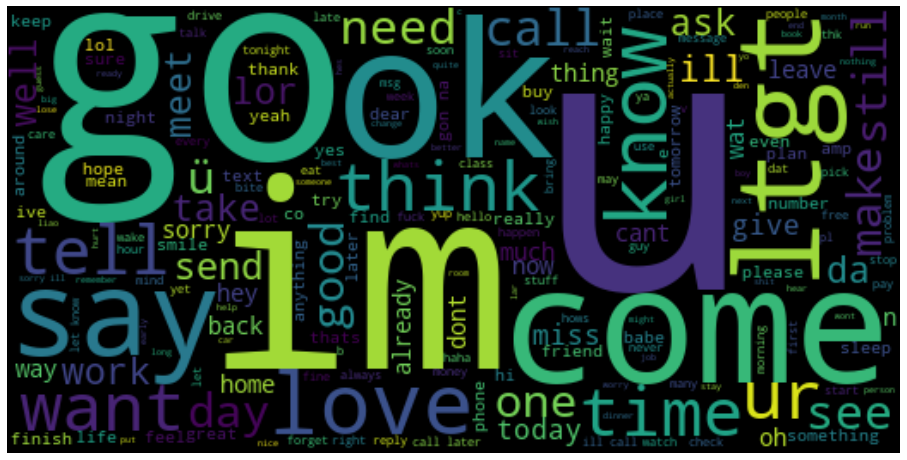

In [ ]:
# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =520, height =260, background_color ="black").generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

Now that we have our document set in the required format, we can proceed to counting the occurrence of each word in each document of the document set.

In [ ]:
# getting frequency count for spam messages

value_counts_spam = {}        
for j in spam_msg_text.split():
    if j not in value_counts_spam:
        value_counts_spam[j]=1
    else:
        value_counts_spam[j]+=1

# sorting in descending order using operator
sorted_spam = dict( sorted(value_counts_spam.items(), key=operator.itemgetter(1),reverse=True))
sorted_spam

{'call': 366,
 'free': 216,
 '2': 173,
 'txt': 150,
 'u': 148,
 'ur': 144,
 'mobile': 123,
 'text': 120,
 '4': 119,
 'claim': 115,
 'stop': 115,
 'reply': 109,
 'now': 96,
 'prize': 94,
 'get': 94,
 'send': 80,
 'tone': 73,
 'service': 72,
 'win': 71,
 'new': 69,
 'award': 66,
 'nokia': 65,
 'urgent': 63,
 'cash': 62,
 'contact': 61,
 'phone': 57,
 'please': 55,
 '16': 51,
 'guarantee': 51,
 'customer': 49,
 'week': 49,
 'per': 46,
 'message': 45,
 'chat': 44,
 '18': 43,
 'draw': 39,
 'number': 39,
 'try': 38,
 'offer': 38,
 'receive': 37,
 'line': 37,
 'latest': 36,
 '£1000': 35,
 'you': 35,
 'show': 35,
 'go': 35,
 '150ppm': 34,
 'mins': 34,
 'camera': 33,
 '1': 33,
 'box': 33,
 'every': 33,
 'po': 32,
 'holiday': 32,
 'landline': 32,
 'want': 32,
 '£2000': 31,
 'live': 30,
 'apply': 29,
 'code': 29,
 'chance': 29,
 'video': 29,
 'tcs': 29,
 'cost': 28,
 'no': 28,
 '£150': 27,
 'network': 27,
 'msg': 27,
 'date': 27,
 'await': 27,
 'entry': 26,
 'select': 26,
 'ringtone': 26,
 'know'

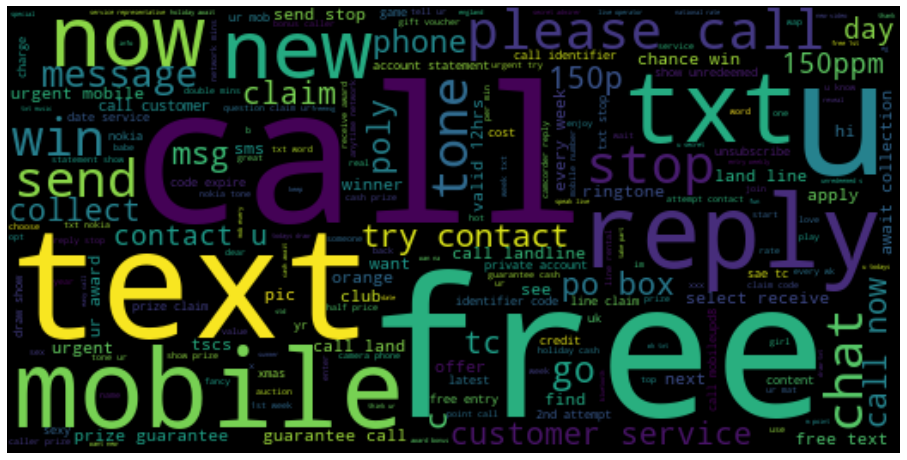

In [ ]:
# wordcloud of spam messages
spam_msg_cloud = WordCloud(width =520, height =260, background_color ="black").generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

### Step 4 - Vectorization 

#### 4.1 Vectorization using TF

When working with text data, we need a method to convert this unstructured data into a form that the machine learning model can work with. One technique to transform text data into a matrix is to count the number of appearances of each word in each document. This technique is called the bag of words model. The model gets its name because each document is viewed as a bag holding all the words, disregarding word order, context, and grammar. After applying the bag of words model to a corpus, the resulting matrix will exhibit patterns that a machine learning model can exploit.

In [ ]:
#using count vectoroizer to create a document-term matrix
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [ ]:
#fitting data
X = count_vector.fit_transform(data.SMS).toarray()

In [ ]:
#getting column names
words=count_vector.get_feature_names()

In [ ]:
# creating tf dataframe
tf_df1=pd.DataFrame(X,columns = words)
tf_df1.head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 4.2 - Vectorization using TF-IDF

Tf-idf vectorization represents a document as a vector of term frequencies, where each element in the vector corresponds to the tf-idf weight of a specific word in the document. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#using tfidf vectorizer
tfidf_vectorizer=TfidfVectorizer()
tfidf_vectors=tfidf_vectorizer.fit_transform(data.SMS).toarray()

In [ ]:
#getting column names
words=tfidf_vectorizer.get_feature_names()

In [ ]:
#Converting the above arrays into data frames with proper column names
tfidf_df1=pd.DataFrame(tfidf_vectors,columns=words)
tfidf_df1.head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 4.3 - Vectorization using doc to vec model

Doc2vec is an unsupervised machine learning algorithm that is used to convert a document to a vector.

We implemented the Doc2Vec model using the Gensim library. 


In [ ]:
from gensim.models import KeyedVectors

In [ ]:
#creating duplicate copy
dup_data=data.copy()
dup_data=dup_data.drop('Labels',axis=1)

In [ ]:
#using google embeddings
embeddings = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary = True)

In [ ]:
#Get the vector for a given word:
def vec(w):
    return (embeddings[w])

In [ ]:
# Converting each document into a vector
dic = {}
i_list = []
for SMS,index in zip(dup_data.SMS,dup_data.index):
    rev_list = []
    for word in SMS.split():
        if word in embeddings.index_to_key:
            index_list.append(index)
            rev_list.append(vec(word))
    dic[SMS] = np.sum(np.array(rev_list),axis=0)
index_set = set(i_list)

In [ ]:
#getting word to vec dataframe
wordtovec_df = pd.DataFrame(dic).T
wordtovec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
go jurong point crazy available bugis n great world la e buffet cine get amore wat,-0.306091,0.525146,0.181152,3.097656,-0.539703,0.839417,1.227844,-1.172852,0.357849,0.971758,...,0.044067,0.730652,-1.497314,1.246155,0.126770,-0.428589,0.267944,-0.986145,-0.584229,0.308746
ok lar joke wif u oni,-0.514664,0.346069,0.268005,0.666748,-0.655273,0.381836,-0.224609,-0.383484,0.206787,0.648438,...,0.585907,0.692627,-0.889587,-0.062134,-1.104492,-0.859497,-1.025391,-0.661713,-0.591064,0.751465
free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s,0.013405,-0.507935,-1.219238,1.262939,1.145691,0.447624,-0.142944,-1.488251,0.719482,2.141296,...,0.339966,0.372314,-0.242859,-0.183105,0.231079,0.006836,-0.082611,-2.170883,-1.645866,0.184910
u dun say early hor u c already say,-0.591125,0.235931,0.973389,0.782776,-1.006348,0.004631,-0.400513,-0.938232,-0.049805,1.060059,...,0.298096,0.553711,-0.416077,-0.128418,-0.598145,-1.251221,-0.859444,-0.646484,-0.136230,0.998901
nah think go usf live around though,-0.037476,0.129181,0.281494,1.360840,-0.222778,0.153076,0.414185,-0.431068,0.498169,0.737688,...,0.079529,0.952637,-0.772949,0.673218,-0.626190,-0.234619,-0.078613,-0.705933,0.634579,-0.308472


In [ ]:
#reseting index for new df
w2v_df=wordtovec_df.reset_index()

In [ ]:
#index
w2v_df['index']

0       go jurong point crazy available bugis n great ...
1                                   ok lar joke wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                     nah think go usf live around though
                              ...                        
5120    2nd time try 2 contact u u £750 pound prize 2 ...
5121                             ü b go esplanade fr home
5122                     pity mood that soany suggestions
5123    guy bitch act like id interest buy something e...
5124                                       rofl true name
Name: index, Length: 5125, dtype: object

In [ ]:
#creating empty column
w2v_df['label']=np.nan

In [ ]:
for i in range(len(data.SMS)): #Filling the nan column with respective label from original file
    for j in range(len(w2v_df['index'])):
        if data['SMS'][i]==w2v_df['index'][j]:
            w2v_df.iloc[j,301]=data['Labels'][j]

In [ ]:
#checking null values
w2v_df.isnull().sum()

index    0
0        0
1        0
2        0
3        0
        ..
296      0
297      0
298      0
299      0
label    0
Length: 302, dtype: int64

In [ ]:
# Renaming the columns
w2v_df.rename(columns = {'index':'SMS'}, inplace = True)

In [ ]:
#reading 5 entries
w2v_df.head()

,SMS,0,1,2,3,4,5,6,7,8,...,291,292,293,294,295,296,297,298,299,label
0,go jurong point crazy available bugis n great ...,-0.306091,0.525146,0.181152,3.097656,-0.539703,0.839417,1.227844,-1.172852,0.357849,...,0.730652,-1.497314,1.246155,0.126770,-0.428589,0.267944,-0.986145,-0.584229,0.308746,0.0
1,ok lar joke wif u oni,-0.514664,0.346069,0.268005,0.666748,-0.655273,0.381836,-0.224609,-0.383484,0.206787,...,0.692627,-0.889587,-0.062134,-1.104492,-0.859497,-1.025391,-0.661713,-0.591064,0.751465,0.0
2,free entry 2 wkly comp win fa cup final tkts 2...,0.013405,-0.507935,-1.219238,1.262939,1.145691,0.447624,-0.142944,-1.488251,0.719482,...,0.372314,-0.242859,-0.183105,0.231079,0.006836,-0.082611,-2.170883,-1.645866,0.184910,1.0
3,u dun say early hor u c already say,-0.591125,0.235931,0.973389,0.782776,-1.006348,0.004631,-0.400513,-0.938232,-0.049805,...,0.553711,-0.416077,-0.128418,-0.598145,-1.251221,-0.859444,-0.646484,-0.136230,0.998901,0.0
4,nah think go usf live around though,-0.037476,0.129181,0.281494,1.360840,-0.222778,0.153076,0.414185,-0.431068,0.498169,...,0.952637,-0.772949,0.673218,-0.626190,-0.234619,-0.078613,-0.705933,0.634579,-0.308472,0.0


In [ ]:
#replacing label to 0 and 1 
w2v_df['label'].replace({'spam':1,'ham':0},inplace=True) 

In [ ]:
#dropping column
W2V = w2v_df.drop(["label","SMS"],axis=1)

In [ ]:
#y column
y_w2v = w2v_df["label"]

In [ ]:
# created wordtovec dataframe
W2V

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.306091,0.525146,0.181152,3.097656,-0.539703,0.839417,1.227844,-1.172852,0.357849,0.971758,...,0.044067,0.730652,-1.497314,1.246155,0.126770,-0.428589,0.267944,-0.986145,-0.584229,0.308746
1,-0.514664,0.346069,0.268005,0.666748,-0.655273,0.381836,-0.224609,-0.383484,0.206787,0.648438,...,0.585907,0.692627,-0.889587,-0.062134,-1.104492,-0.859497,-1.025391,-0.661713,-0.591064,0.751465
2,0.013405,-0.507935,-1.219238,1.262939,1.145691,0.447624,-0.142944,-1.488251,0.719482,2.141296,...,0.339966,0.372314,-0.242859,-0.183105,0.231079,0.006836,-0.082611,-2.170883,-1.645866,0.184910
3,-0.591125,0.235931,0.973389,0.782776,-1.006348,0.004631,-0.400513,-0.938232,-0.049805,1.060059,...,0.298096,0.553711,-0.416077,-0.128418,-0.598145,-1.251221,-0.859444,-0.646484,-0.136230,0.998901
4,-0.037476,0.129181,0.281494,1.360840,-0.222778,0.153076,0.414185,-0.431068,0.498169,0.737688,...,0.079529,0.952637,-0.772949,0.673218,-0.626190,-0.234619,-0.078613,-0.705933,0.634579,-0.308472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5120,0.170166,0.329468,0.508041,0.992554,0.031281,0.425491,0.846039,-1.034912,0.673828,0.859375,...,0.121338,0.694824,-1.530426,-0.488586,-0.690674,-0.796021,-1.274658,-1.053421,-0.379272,-0.236938
5121,-0.095459,0.435547,0.757507,0.598358,-0.265137,-0.123322,-0.433472,-0.927454,-0.105591,0.100115,...,-0.321777,0.761475,-0.770889,0.526550,-0.109619,-0.556885,-0.405884,-0.772461,0.130371,0.607300
5122,0.117065,0.444824,0.129395,0.318848,-0.536377,0.019287,0.147400,-0.442871,0.287109,0.408691,...,-0.761292,0.238464,0.072510,-0.403259,0.041748,0.255859,0.490570,-0.102020,-0.000244,-0.126587
5123,1.669189,-0.189941,0.117290,1.900146,-1.308471,0.646667,1.088928,-1.360138,0.302704,1.193481,...,-0.060314,1.296844,-1.731689,0.147003,-0.552490,-0.297543,0.326752,-0.820661,-0.755623,-1.078926


### 5 - Dimension Reduction 

#### 5.a - PCA for dimension reduction

In [ ]:
X=wordtovec_df
X.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
go jurong point crazy available bugis n great world la e buffet cine get amore wat,-0.306091,0.525146,0.181152,3.097656,-0.539703,0.839417,1.227844,-1.172852,0.357849,0.971758,...,0.044067,0.730652,-1.497314,1.246155,0.126770,-0.428589,0.267944,-0.986145,-0.584229,0.308746
ok lar joke wif u oni,-0.514664,0.346069,0.268005,0.666748,-0.655273,0.381836,-0.224609,-0.383484,0.206787,0.648438,...,0.585907,0.692627,-0.889587,-0.062134,-1.104492,-0.859497,-1.025391,-0.661713,-0.591064,0.751465
free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s,0.013405,-0.507935,-1.219238,1.262939,1.145691,0.447624,-0.142944,-1.488251,0.719482,2.141296,...,0.339966,0.372314,-0.242859,-0.183105,0.231079,0.006836,-0.082611,-2.170883,-1.645866,0.184910
u dun say early hor u c already say,-0.591125,0.235931,0.973389,0.782776,-1.006348,0.004631,-0.400513,-0.938232,-0.049805,1.060059,...,0.298096,0.553711,-0.416077,-0.128418,-0.598145,-1.251221,-0.859444,-0.646484,-0.136230,0.998901
nah think go usf live around though,-0.037476,0.129181,0.281494,1.360840,-0.222778,0.153076,0.414185,-0.431068,0.498169,0.737688,...,0.079529,0.952637,-0.772949,0.673218,-0.626190,-0.234619,-0.078613,-0.705933,0.634579,-0.308472


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(0.95)
  
x_wordtovec_pca = pca.fit_transform(X)
x_wordtovec_pca.shape

(5125, 187)

In [ ]:
tf_df.shape

(5572, 349)

### 6 - Spam Filters

#### 6.a - Model building

In [ ]:
# Converting our labels to binary variables, 0 to represent 'ham'(i.e. not spam) and 1 to represent 'spam' for sms.
# Scikit-learn only deals with numerical values

data['Labels'] = data.Labels.map({'ham':0, 'spam':1})
data.head()


,Labels,SMS
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joke wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah think go usf live around though


#### 6.a.1 - Train validation test split and fitting model for tf vectorized 

In [ ]:
y=data.Labels
from sklearn.model_selection import train_test_split
# Splitting the data into train-validation-test
X_train, X_test, y_train, y_test = train_test_split(tf_df1, y, test_size = 0.1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2)

In [ ]:
#import libraries for Model fittings
import sklearn.ensemble as ensemble #import ensemble for bagging
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,f1_score,roc_auc_score #import Scoring metric
from sklearn.ensemble import RandomForestClassifier #import randomforest Classifier
from sklearn.ensemble import AdaBoostClassifier #import adaboostclassifer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC #import support vector classifier
from sklearn.linear_model import LogisticRegression # import logistic regression
from sklearn.neighbors import KNeighborsClassifier # import knn classifier

#### Model 1 - Decision Tree Classifier

In [ ]:
#Training the model 
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt_tf = dt.predict(X_valid)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_valid,pred_dt_tf))
print("AUROC Score",roc_auc_score(y_valid,pred_dt_tf))

Classification Report of Decision Tree:               precision    recall  f1-score   support

           0       0.96      0.97      0.97       847
           1       0.85      0.81      0.83       156

    accuracy                           0.95      1003
   macro avg       0.91      0.89      0.90      1003
weighted avg       0.95      0.95      0.95      1003

AUROC Score 0.8902688220870039


#### Model 3 - Random forest classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)        # fitting training data in random forest model

pred_rf_tf= rf.predict(X_valid)

In [ ]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_rf_tf)
cm

array([[847,   0],
       [ 33, 123]], dtype=int64)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_valid,pred_rf_tf))
print("AUROC Score",roc_auc_score(y_valid,pred_rf_tf))

Classification Report of Decision Tree:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       847
           1       1.00      0.79      0.88       156

    accuracy                           0.97      1003
   macro avg       0.98      0.89      0.93      1003
weighted avg       0.97      0.97      0.97      1003

AUROC Score 0.8942307692307692


#### Model 4 - Ada Boost classifier

In [ ]:
ab = AdaBoostClassifier()
ab.fit(X_train, y_train) # fitting training data in adaboost model

pred_ada_tf = ab.predict(X_valid) 

In [ ]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_ada_tf)
cm

array([[837,  10],
       [ 30, 126]], dtype=int64)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_valid,pred_ada_tf))
print("AUROC Score",roc_auc_score(y_valid,pred_ada_tf))

Classification Report of Decision Tree:               precision    recall  f1-score   support

           0       0.97      0.99      0.98       847
           1       0.93      0.81      0.86       156

    accuracy                           0.96      1003
   macro avg       0.95      0.90      0.92      1003
weighted avg       0.96      0.96      0.96      1003

AUROC Score 0.8979429661247843


#### Model 5 - Support Vector Machine

In [ ]:
svc=SVC()
svc.fit(X_train, y_train) # fitting training data in svc model

pred_svc_tf = svc.predict(X_valid) 

In [ ]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_svc_tf)
cm

array([[847,   0],
       [ 32, 124]], dtype=int64)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_valid,pred_svc_tf))
print("AUROC Score",roc_auc_score(y_valid,pred_svc_tf))

Classification Report of Decision Tree:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       847
           1       1.00      0.79      0.89       156

    accuracy                           0.97      1003
   macro avg       0.98      0.90      0.93      1003
weighted avg       0.97      0.97      0.97      1003

AUROC Score 0.8974358974358974


#### Model 6 - Logistic regression

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)   # fitting training data in logistic model

pred_lr_tf = lr.predict(X_valid)

In [ ]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_lr_tf)
cm

array([[881,   0],
       [ 23,  99]], dtype=int64)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_valid,pred_lr_tf))
print("AUROC Score",roc_auc_score(y_valid,pred_lr_tf))

Classification Report of Decision Tree:               precision    recall  f1-score   support

           0       0.97      1.00      0.99       881
           1       1.00      0.81      0.90       122

    accuracy                           0.98      1003
   macro avg       0.99      0.91      0.94      1003
weighted avg       0.98      0.98      0.98      1003

AUROC Score 0.9057377049180328


#### Model 7 - KNN Classifier

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

pred_knn_tf=knn.predict(X_valid)

In [ ]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_knn_tf)
cm

array([[847,   0],
       [109,  47]], dtype=int64)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_valid,pred_knn_tf))
print("AUROC Score",roc_auc_score(y_valid,pred_knn_tf))

Classification Report of Decision Tree:               precision    recall  f1-score   support

           0       0.89      1.00      0.94       847
           1       1.00      0.30      0.46       156

    accuracy                           0.89      1003
   macro avg       0.94      0.65      0.70      1003
weighted avg       0.90      0.89      0.87      1003

AUROC Score 0.6506410256410257


#### 6.a.2 - Train validation test split and fitting model for tf-idf vectorized 

In [ ]:
# Splitting the data into train-validation-test
X_train, X_test, y_train, y_test = train_test_split(tfidf_df1, y, test_size = 0.1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2)

#### Model 1 - Decision Tree Classifier

In [ ]:
#Training the model 
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt_tfidf = dt.predict(X_valid)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_valid,pred_dt_tfidf))
print("AUROC Score",roc_auc_score(y_valid,pred_dt_tfidf))

Classification Report of Decision Tree:               precision    recall  f1-score   support

           0       0.97      0.98      0.98       864
           1       0.89      0.84      0.86       139

    accuracy                           0.96      1003
   macro avg       0.93      0.91      0.92      1003
weighted avg       0.96      0.96      0.96      1003

AUROC Score 0.9121827537969625


#### Model 3 - Random forest classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)        # fitting training data in random forest model

pred_rf_tfidf= rf.predict(X_valid)

In [ ]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_rf_tfidf)
cm

array([[864,   0],
       [ 22, 117]], dtype=int64)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_valid,pred_rf_tfidf))
print("AUROC Score",roc_auc_score(y_valid,pred_rf_tfidf))

Classification Report of Decision Tree:               precision    recall  f1-score   support

           0       0.98      1.00      0.99       864
           1       1.00      0.84      0.91       139

    accuracy                           0.98      1003
   macro avg       0.99      0.92      0.95      1003
weighted avg       0.98      0.98      0.98      1003

AUROC Score 0.920863309352518


#### Model 4 - Ada Boost classifier

In [ ]:
ab = AdaBoostClassifier()
ab.fit(X_train, y_train) # fitting training data in adaboost model

pred_ada_tfidf = ab.predict(X_valid) 

In [ ]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_ada_tfidf)
cm

array([[860,   4],
       [ 19, 120]], dtype=int64)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_valid,pred_ada_tfidf))
print("AUROC Score",roc_auc_score(y_valid,pred_ada_tfidf))

Classification Report of Decision Tree:               precision    recall  f1-score   support

           0       0.98      1.00      0.99       864
           1       0.97      0.86      0.91       139

    accuracy                           0.98      1003
   macro avg       0.97      0.93      0.95      1003
weighted avg       0.98      0.98      0.98      1003

AUROC Score 0.9293398614441779


#### Model 5 - Support Vector Machine

In [ ]:
svc=SVC()
svc.fit(X_train, y_train) # fitting training data in svc model

pred_svc_tfidf = svc.predict(X_valid) 

In [ ]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_svc_tfidf)
cm

array([[863,   1],
       [ 21, 118]], dtype=int64)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_valid,pred_svc_tfidf))
print("AUROC Score",roc_auc_score(y_valid,pred_svc_tfidf))

Classification Report of Decision Tree:               precision    recall  f1-score   support

           0       0.98      1.00      0.99       864
           1       0.99      0.85      0.91       139

    accuracy                           0.98      1003
   macro avg       0.98      0.92      0.95      1003
weighted avg       0.98      0.98      0.98      1003

AUROC Score 0.9238817279509726


#### Model 6 - Logistic regression

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)   # fitting training data in logistic model

pred_lr_tfidf = lr.predict(X_valid)

In [ ]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_lr_tfidf)
cm

array([[863,   1],
       [ 45,  94]], dtype=int64)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_valid,pred_lr_tfidf))
print("AUROC Score",roc_auc_score(y_valid,pred_lr_tfidf))

Classification Report of Decision Tree:               precision    recall  f1-score   support

           0       0.95      1.00      0.97       864
           1       0.99      0.68      0.80       139

    accuracy                           0.95      1003
   macro avg       0.97      0.84      0.89      1003
weighted avg       0.96      0.95      0.95      1003

AUROC Score 0.837550792699174


#### Model 7 - KNN Classifier

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

pred_knn_tfidf=knn.predict(X_valid)

In [ ]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_knn_tfidf)
cm

array([[864,   0],
       [108,  31]], dtype=int64)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_valid,pred_knn_tfidf))
print("AUROC Score",roc_auc_score(y_valid,pred_knn_tfidf))

Classification Report of Decision Tree:               precision    recall  f1-score   support

           0       0.89      1.00      0.94       864
           1       1.00      0.22      0.36       139

    accuracy                           0.89      1003
   macro avg       0.94      0.61      0.65      1003
weighted avg       0.90      0.89      0.86      1003

AUROC Score 0.6115107913669064


#### 6.a.3 - Train validation test split and fitting model for word2vec vectorized 

In [ ]:
# Splitting the data into train-validation-test
X_train, X_test, y_train, y_test = train_test_split(W2V, y_w2v, test_size = 0.1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2)

#### Model 1 - Decision Tree Classifier

In [ ]:
#Training the model 
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt_tw2v = dt.predict(X_valid)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_valid,pred_dt_tw2v))
print("AUROC Score",roc_auc_score(y_valid,pred_dt_tw2v))

Classification Report of Decision Tree:               precision    recall  f1-score   support

         0.0       0.86      0.85      0.86       797
         1.0       0.13      0.14      0.14       126

    accuracy                           0.75       923
   macro avg       0.50      0.50      0.50       923
weighted avg       0.76      0.75      0.76       923

AUROC Score 0.49677361534325143


#### Model 3 - Random forest classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)        # fitting training data in random forest model

pred_rf_w2v= rf.predict(X_valid)

In [ ]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_rf_w2v)
cm

array([[796,   1],
       [125,   1]], dtype=int64)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_valid,pred_rf_w2v))
print("AUROC Score",roc_auc_score(y_valid,pred_rf_w2v))

Classification Report of Decision Tree:               precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       797
         1.0       0.50      0.01      0.02       126

    accuracy                           0.86       923
   macro avg       0.68      0.50      0.47       923
weighted avg       0.81      0.86      0.80       923

AUROC Score 0.5033409013961084


#### Model 4 - Ada Boost classifier

In [ ]:
ab = AdaBoostClassifier()
ab.fit(X_train, y_train) # fitting training data in adaboost model

pred_ada_w2v = ab.predict(X_valid) 

In [ ]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_ada_w2v)
cm

array([[782,  15],
       [125,   1]], dtype=int64)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_valid,pred_ada_w2v))
print("AUROC Score",roc_auc_score(y_valid,pred_ada_w2v))

Classification Report of Decision Tree:               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       797
         1.0       0.06      0.01      0.01       126

    accuracy                           0.85       923
   macro avg       0.46      0.49      0.47       923
weighted avg       0.75      0.85      0.79       923

AUROC Score 0.4945579653860708


#### Model 5 - Support Vector Machine

In [ ]:
svc=SVC()
svc.fit(X_train, y_train) # fitting training data in svc model

pred_svc_w2v = svc.predict(X_valid) 

In [ ]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_svc_w2v)
cm

array([[797,   0],
       [126,   0]], dtype=int64)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_valid,pred_svc_w2v))
print("AUROC Score",roc_auc_score(y_valid,pred_svc_w2v))

Classification Report of Decision Tree:               precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       797
         1.0       0.00      0.00      0.00       126

    accuracy                           0.86       923
   macro avg       0.43      0.50      0.46       923
weighted avg       0.75      0.86      0.80       923

AUROC Score 0.5


#### Model 6 - Logistic regression

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)   # fitting training data in logistic model

pred_lr_w2v = lr.predict(X_valid)

In [ ]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_lr_w2v)
cm

array([[792,   5],
       [126,   0]], dtype=int64)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_valid,pred_lr_w2v))
print("AUROC Score",roc_auc_score(y_valid,pred_lr_w2v))

Classification Report of Decision Tree:               precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       797
         1.0       0.00      0.00      0.00       126

    accuracy                           0.86       923
   macro avg       0.43      0.50      0.46       923
weighted avg       0.74      0.86      0.80       923

AUROC Score 0.4968632371392723


#### Model 7 - KNN Classifier

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

pred_knn_w2v=knn.predict(X_valid)

In [ ]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_knn_w2v)
cm

array([[780,  17],
       [124,   2]], dtype=int64)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_valid,pred_knn_w2v))
print("AUROC Score",roc_auc_score(y_valid,pred_knn_w2v))

Classification Report of Decision Tree:               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       797
         1.0       0.11      0.02      0.03       126

    accuracy                           0.85       923
   macro avg       0.48      0.50      0.47       923
weighted avg       0.76      0.85      0.80       923

AUROC Score 0.4972715142100336


#### 6.b - Hyperparameter tunning on well performed model

In [ ]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV

#### Performing grid search on Logistic model of Tf vector dataframe

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}


In [ ]:
lr=LogisticRegression(C=10,penalty='l2')
lr.fit(X_train,y_train)   # fitting training data in logistic model

pred_lr_tf = lr.predict(X_valid)

In [ ]:
# Confusion Matrix 
cm = confusion_matrix(y_valid,pred_lr_tf)
cm

array([[880,   1],
       [ 20, 102]], dtype=int64)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_valid,pred_lr_tf))
print("AUROC Score",roc_auc_score(y_valid,pred_lr_tf))

Classification Report of Decision Tree:               precision    recall  f1-score   support

           0       0.98      1.00      0.99       881
           1       0.99      0.84      0.91       122

    accuracy                           0.98      1003
   macro avg       0.98      0.92      0.95      1003
weighted avg       0.98      0.98      0.98      1003

AUROC Score 0.9174652499953481


### Final testing 

In [ ]:
pred_lr_fin = lr.predict(X_test)

In [ ]:
# Confusion Matrix 
cm = confusion_matrix(y_test,pred_lr_fin)
cm

array([[477,   1],
       [  9,  71]], dtype=int64)

In [ ]:
print("Classification Report of Decision Tree:",classification_report(y_test,pred_lr_fin))
print("AUROC Score",roc_auc_score(y_test,pred_lr_fin))

Classification Report of Decision Tree:               precision    recall  f1-score   support

           0       0.98      1.00      0.99       478
           1       0.99      0.89      0.93        80

    accuracy                           0.98       558
   macro avg       0.98      0.94      0.96       558
weighted avg       0.98      0.98      0.98       558

AUROC Score 0.9427039748953975


In [ ]:
### Conclusion

In conclusion, detecting spam SMS messages is an important task in the field of NLP and machine learning. 

There are several techniques we used for this purpose, including natural language preprocessing, feature extraction, and machine learning algorithms. Lemmatization and word cloud are two techniques that we used in the preprocessing and feature extraction stages of spam SMS detection.. 

We used machine learning algorithms,  NLP preprocessing to achieve the best results.

In this Classification problem of message as spam or ham it is very important to clean the data .

Data applied on TF and TF IDF , word to vec vectorization
     process it is observed that TF-IDF vectorized data performance on 
     all model is better than any other model.

Ada boost and Random forest is performing better than other model. KNN provide least performance. 

Accuracy: AUCROC - 0.94